# **Chapter 5. 머신러닝(Machine Learning) 기초** 





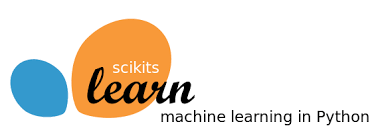


---
### **학습 목표**
> 5-1. 머신 러닝 개요 <br>
> 5-2. sklearn 이란? <br>
> 5-3. 전처리 기본 (정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할) <br>
> 5-4. 분류 분석 모델링 <br>
> 5-5. 분류 성능 평가하기 <br>
> 5-6. 회귀 분석 모델링 <br>
> 5-7. 회귀 성능 평가하기 <br>
> **5-8. 앙상블 모델링** <br>
> 5-9. 하이퍼파라미터(hyper-parameter) 튜닝 <br>
> 5-10. 비지도 군집화 분석

## 5-8. 앙상블(Ensemble) 모델링
> #### 앙상블 학습이란?
> - **여러개의 머신 러닝 모델을 결합함**으로써 보다 **정확한 예측**을 할 수 있게 해주는 방법을 말합니다.
> - 강력한 하나의 모델을 사용하는 대신, 보다 약한 모델 여러개를 조합해 더 정확한 예측을 할 수 있게 해줍니다.
> - 예를 들어, **어떤 어려운 문제**를 해결하는데, **한명의 전문가 보다**, **여러명의 집단 지성을 이용**하면 더 손쉽게 문제를 풀 수 있는 개념을 사용한 기법입니다.
> - 앙상블 모델링은 일반적으로 **배깅(Bagging)**, 과 **부스팅(Boosting)** 방법이 대표적입니다.
> - **배깅(Bagging)** : 데이터 샘플링을 통해 여러 모델을 학습한 후, 결과를 집계하는 방법
    - 모두 같은 알고리즘으로 구성
    - 과적합(Overfitting) 방지에 효과적
    - 대표 알고리즘 : 랜덤 포레스트(RandomForest)
> - **부스팅(Boosting)** : 여러 모델이 순차적으로 이전 오차를 줄이는 방향으로 학습을 진행
    - 이전 모델이 틀린 데이터에 대해 올바르게 예측할 수 있도록 다음 모델에 가증치(weight) 을 부여하는 방식
    - 예측 성능이 뛰어나, 앙상블 학습에서 가장 각광받는 방식입니다.
    - 속도가 비교적 느리다.
    - 대표 알고리즘 : XGBoost, LightGBM




> 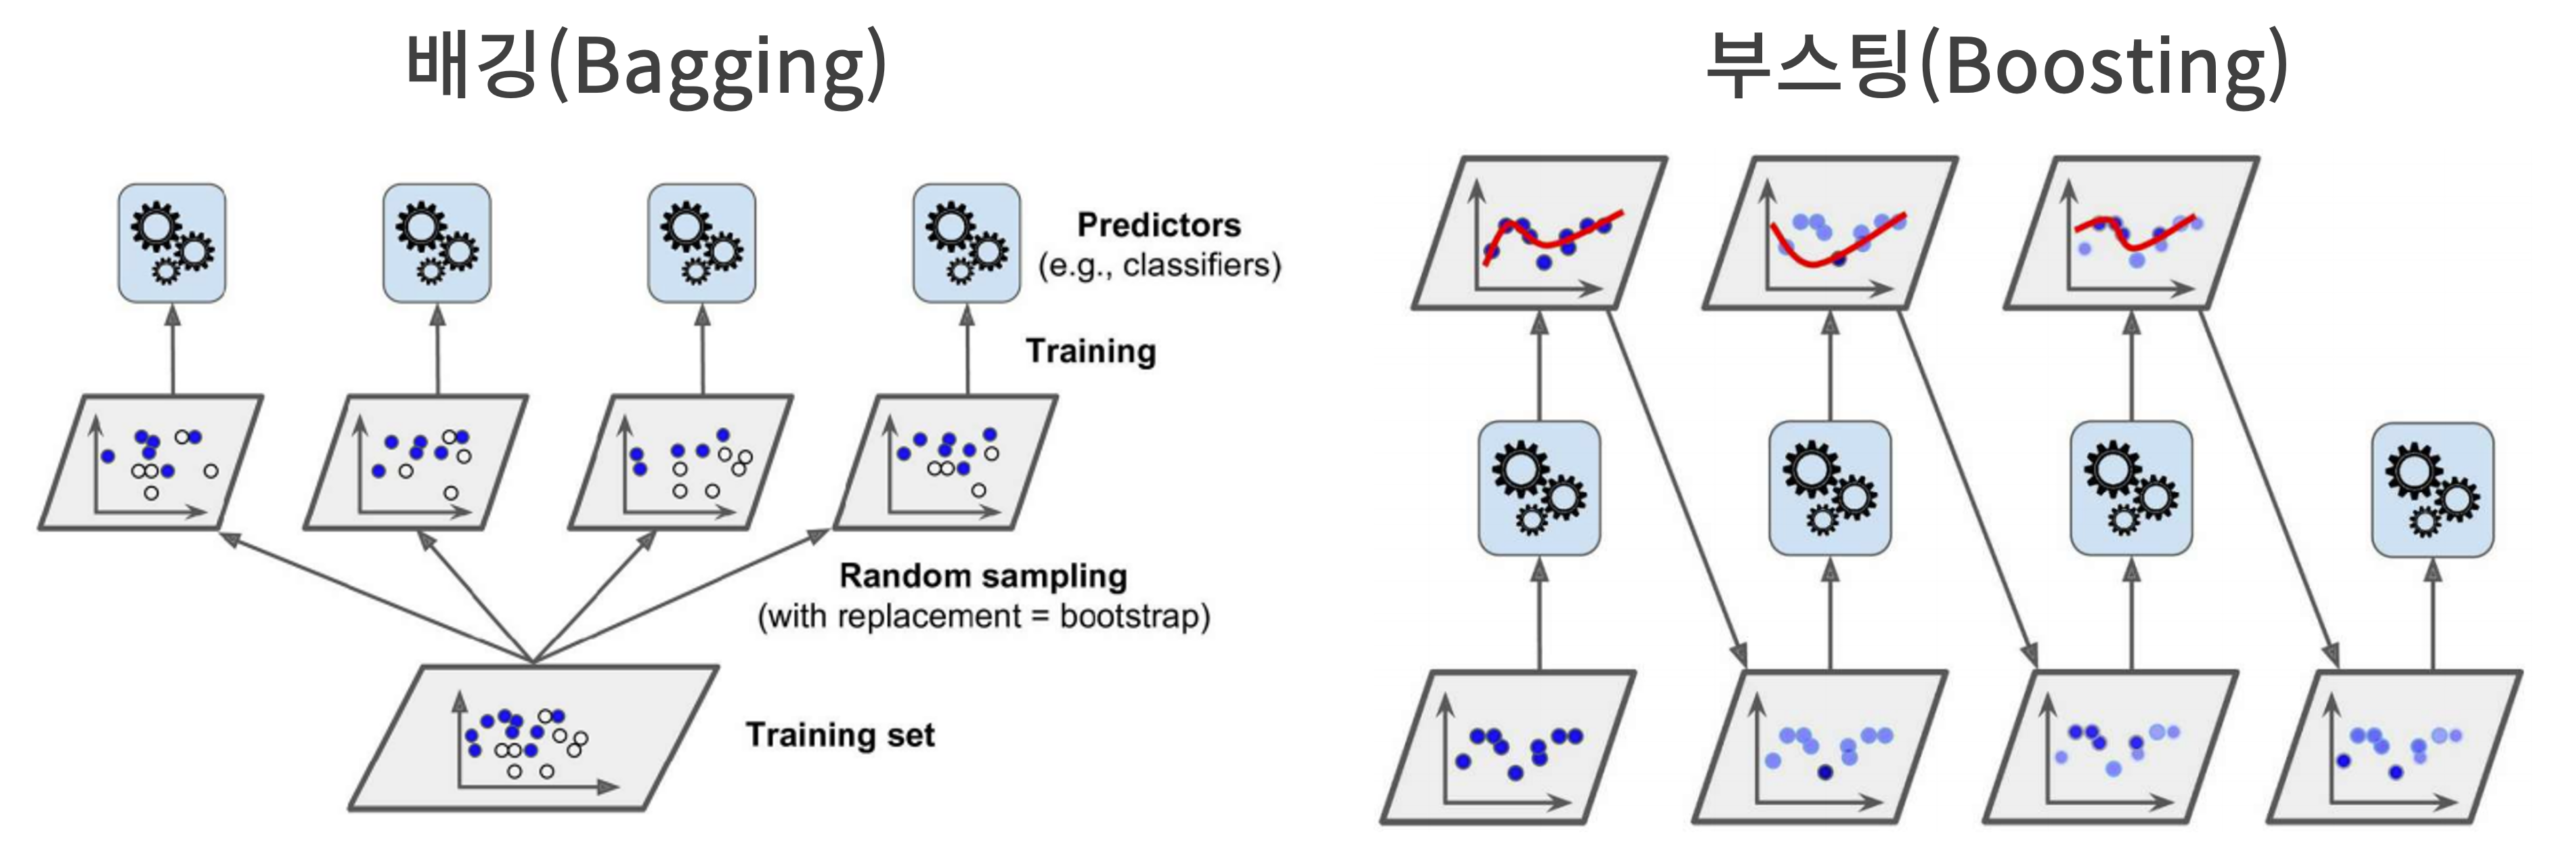

In [69]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [70]:
## 이전 강의에서 다룬 내용 (전처리, 모델 학습, 예측)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split    # 라이브러리 로딩
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

dataset = fetch_california_housing()
cal_house_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
cal_house_df['Price($)'] = dataset.target * 100000

X = cal_house_df.drop('Price($)', axis=1)  # 예측에 사용할 변수 
Y = cal_house_df['Price($)']               # 예측할 변수

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, shuffle=True)

# 다중 선형 회귀 모델 학습
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)

# 예측 결과 확인
predictions = mlr_model.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1 - ( 1 - r2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )


print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 51511.01
MSE: 4344458792.23
RMSE: 65913
R2: 0.65
adj_R2: 0.64


> ###  **5-8-1. Random Forest**
> - 랜덤 포레스트 (Random Forest) 는 **의사 결정 나무 (Decision Tree) 성능을 보다 개선**시키기 위해, **여러개의 나무**를 만들어서 **각 나무들의 예측 결과를 조합**해 최종 결정을 내리는 대표적인 **배깅(Bagging)** 알고리즘입니다.
> - 성능이 우수해서 현재까지도 **실제 문제에서 가장 널리 사용**되는 인기 알고리즘입니다.
> - **Random Forest 특징**
    - 각 나무마다 랜덤하게 데이터를 샘플링 (복원 추출) : 각 나무마다 훈련하는 데이터가 다름
    - 다수의 나무가 결정한 값으로 (다수결) 최종 결정을 내림
    - 나무 개수가 많을 수록 정확도는 개선되지만, 일정 지점이 넘으면 급격히 안좋아지는 경향 (데이터 규모와 성격에 맞게 지정 필요!)
    - 분류 / 회귀 문제 모두 적용 가능


> 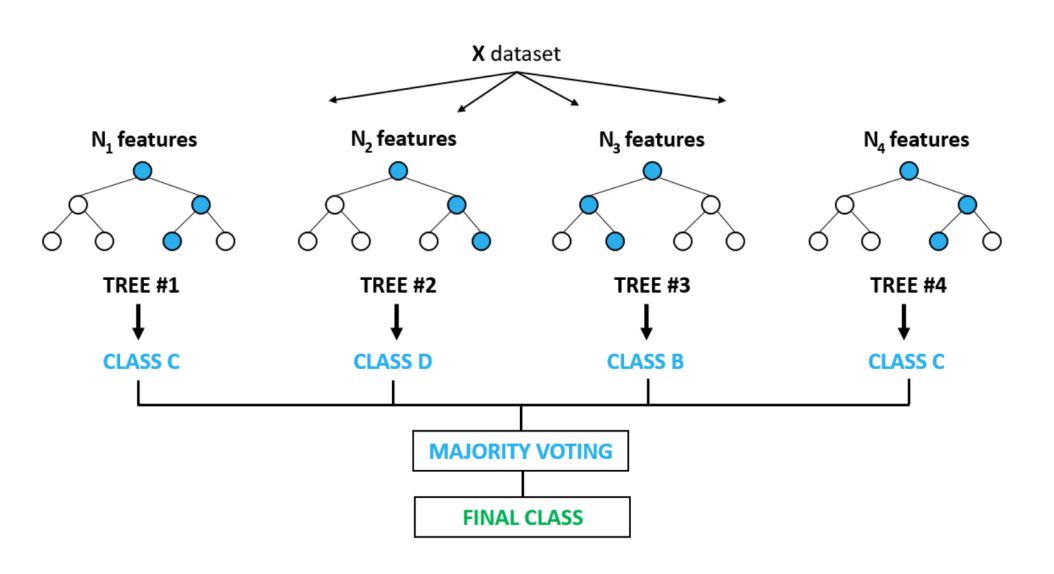

In [71]:
# 라이브러리 로딩
from sklearn.ensemble import RandomForestRegressor  # 분류 문제 : RandomForestClassifier

In [72]:
# 모델 정의 / 학습
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [73]:
# 모델 정의 / 학습
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [74]:
# 예측 결과 확인
predictions = rf_model.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1 - ( 1 - r2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 32126.2
MSE: 2223554744.11
RMSE: 47155
R2: 0.82
adj_R2: 0.82


> ###  **5-8-2. XGBoost**
> - XGBoost 는 Extreme Gradient Boosting 의 약자입니다. **앙상블 부스팅(Boosting) 기법 중 대표적인 알고리즘**이며, 성능이 좋고, 속도가 빠른 장점이 있습니다.
> - **XGBoost 특징**
    - 나무 분기를 균형 있게 해 나가는 방식입니다
    - 다양한 옵션으로 커스터마이징이 뛰어나다
    - 변수 중요도 (feature importance) 를 제공해 준다
    - 조기 종료(Early Stopping) 기능 제공
    - 분류 / 회귀 문제 모두 적용 가능

> 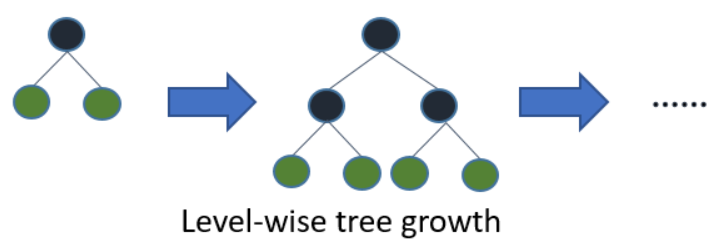

In [75]:
# 라이브러리 로딩
from xgboost import XGBRegressor  # 분류 문제 : XGBClassifier
from xgboost import plot_importance

In [76]:
# 모델 정의 / 학습
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

[08:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

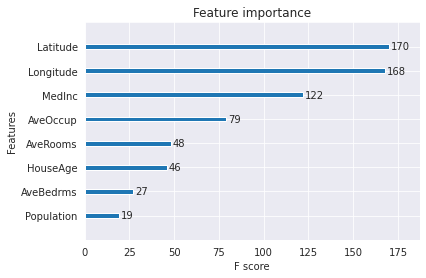

In [77]:
# 변수 중요도 (feature importance)
plot_importance(xgb_model)

In [78]:
# 예측 결과 확인
predictions = xgb_model.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1 - ( 1 - r2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 35882.21
MSE: 2472180603.48
RMSE: 49721
R2: 0.8
adj_R2: 0.79


> ###  **5-8-3. LightGBM**
> - LightGBM 은 XGBoost 와 마찬가지로 대표적인 부스팅(Boosting) 방법 중에 하나입니다.
> - XGBoost 와 다른 점은, 나무 분기 방식이 균형적으로 되는 것이 아니라, **많이 틀린 leaf 쪽으로 분기되어 나가는 성격**을 가지고 있습니다.
> - **LightGBM 특징**
    - 나무 분기를 불균형하게 해 나가는 방식입니다 (최대 손실을 줄이기 위한 방향으로)
    - 학습 시간이 매우 빠르다
    - 적은 dataset 을 사용할 경우, 과적합 가능성이 크다 (10,000개 이상 데이터 권장)
    - 분류 / 회귀 문제 모두 적용 가능

> 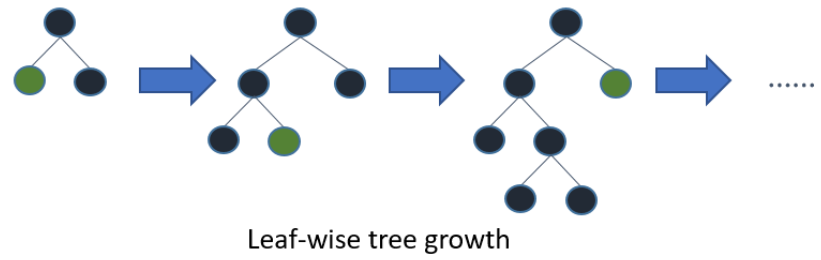

In [79]:
# 라이브러리 로딩
from lightgbm import LGBMRegressor  # 분류 문제 : LGBMClassifier

In [80]:
# 모델 정의 / 학습
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, Y_train)

LGBMRegressor()

In [81]:
# 예측 결과 확인
predictions = lgbm_model.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1 - ( 1 - r2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 31040.67
MSE: 1951833638.19
RMSE: 44180
R2: 0.84
adj_R2: 0.84


> **앙상블 모델 간 성능 비교**

In [82]:
# 모델 별 성능 집계
mae, mse, rmse, r2,  adj_r2 = [], [], [], [], []

In [83]:
for model in [mlr_model, rf_model, xgb_model, lgbm_model]:
    predictions = model.predict(X_test)
    mae.append(mean_absolute_error(Y_test, predictions))
    mse.append(mean_squared_error(Y_test, predictions))
    rmse.append(mse[-1])
    r2.append(r2_score(Y_test, predictions))
    adj_r2.append(1 - ( 1 - r2[-1] ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 ))

In [84]:
perf_df = pd.DataFrame({'model':['MLR(Default)', 'RandomForest', 'XGBoost', 'LightGBM'],
                        'MAE':mae,
                        'MSE':mse,
                        'RMSE':rmse,
                        'R2':r2,
                        'adj_R2':adj_r2})

In [85]:
perf_df

,model,MAE,MSE,RMSE,R2,adj_R2
0,MLR(Default),51511.007444,4.344459e+09,4.344459e+09,0.652973,0.638952
1,RandomForest,32126.202077,2.223555e+09,2.223555e+09,0.822387,0.815211
2,XGBoost,35882.212391,2.472181e+09,2.472181e+09,0.802527,0.794548
3,LightGBM,31040.671984,1.951834e+09,1.951834e+09,0.844091,0.837792


Text(0.5, 1.0, 'R2')

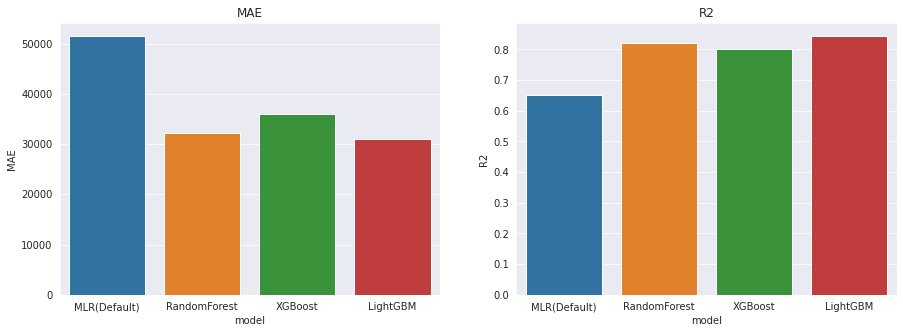

In [86]:
# 앙상블 모델 성능 시각화
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# MAE
sns.barplot(data=perf_df, x="model", y="MAE", ax = axes[0])
axes[0].set_title("MAE")
# R2
sns.barplot(data=perf_df, x="model", y="R2", ax = axes[1])
axes[1].set_title("R2")